<a href="https://colab.research.google.com/github/kdave123/DocNet/blob/master/OptimizewithNegDocNetTFlowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm

DATADIR = "drive/My Drive/Colab Notebooks/dataset"

CATEGORIES = ["aa/train","pa/train","negative"]

training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  
        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (128, 74))  # resize to normalize data size
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))




DATADIR = "drive/My Drive/Colab Notebooks/dataset"

CATEGORIES = ["real_a","real_p","test_negative"]

test_data = []

def create_test_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) ]
                new_array = cv2.resize(img_array, (128, 74))  # resize to normalize data size
                test_data.append([new_array, class_num]) 
            except Exception as e: 
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))



  0%|          | 0/1 [00:00<?, ?it/s]

4338


100%|██████████| 1/1 [00:00<00:00, 107.91it/s]

26


2


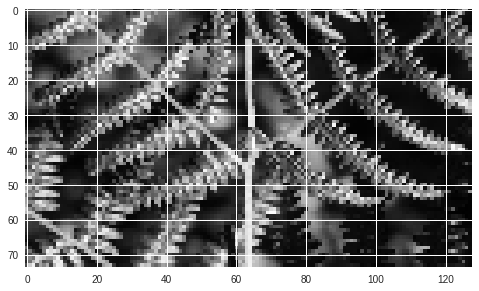

4338
2


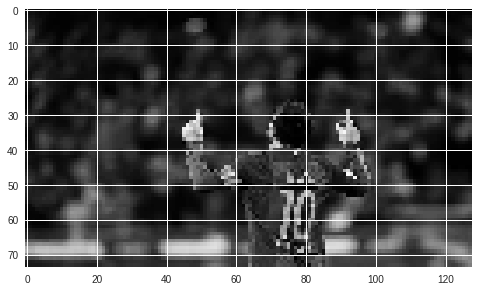

2


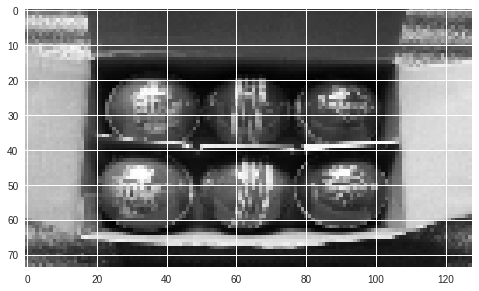

26
0


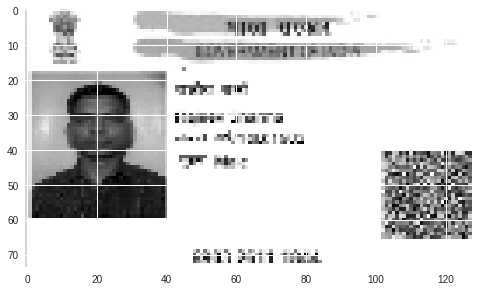

In [0]:



print(training_data[4000][1])
plt.imshow(training_data[4000][0], cmap='gray')
plt.show()


import random

random.shuffle(training_data)

print(len(training_data))
X_training = []
Y_training = []

for features,label in training_data:
    X_training.append(features)
    Y_training.append(label)
print(Y_training[23])
plt.imshow(X_training[23], cmap='gray')
plt.show()
X_training = (np.array(X_training).reshape(-1, 128, 74, 1))
Y_training = np.array(Y_training)




import pickle

pickle_out = open("drive/My Drive/X_training.pickle","wb")
pickle.dump(X_training, pickle_out)
pickle_out.close()

pickle_out = open("drive/My Drive/Y_training.pickle","wb")
pickle.dump(Y_training, pickle_out)
pickle_out.close()

#for restoring
#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)




print(test_data[25][1])
plt.imshow(test_data[25][0], cmap='gray')
plt.show()



random.shuffle(test_data)

print(len(test_data))
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)
plt.imshow(X_test[23],cmap="gray")   
print(Y_test[0])
X_test = (np.array(X_test).reshape(-1, 128, 74, 1))
Y_test = np.array(Y_test)


pickle_out = open("drive/My Drive/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("drive/My Drive/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

#for restoring
#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)

In [0]:
from keras.utils import to_categorical
%matplotlib inline

print('Training data shape : ', X_training.shape, Y_training.shape)

print('Testing data shape : ', X_test.shape, Y_test.shape)


classes = np.unique(Y_training)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)



plt.figure(figsize=[5,5])

#Display the first image in training data
#plt.subplot(121)
#plt.imshow(X_training[2500,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(Y_training[2500]))

# Display the first image in testing data
#plt.subplot(122)
#plt.imshow(X_test[24,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(Y_test[24]))

Using TensorFlow backend.


Training data shape :  (4338, 128, 74, 1) (4338,)
Testing data shape :  (26, 128, 74, 1) (26,)
Total number of outputs :  3
Output classes :  [0 1 2]


In [0]:
X_training = X_training.astype('float32')
X_test = X_test.astype('float32')
X_training = X_training / 255.
X_test = X_test / 255.

In [0]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(Y_training)
test_Y_one_hot = to_categorical(Y_test)

# Display the change for category label using one-hot encoding
print('Original label:', Y_training[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
print('After conversion to one-hot:', test_Y_one_hot[0])
print(Y_test)


Original label: 0
After conversion to one-hot: [1. 0. 0.]
After conversion to one-hot: [1. 0. 0.]
[0 0 0 0 0 2 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0]


In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(X_training, train_Y_one_hot, test_size=0.2, random_state=13)

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((3470, 128, 74, 1), (868, 128, 74, 1), (3470, 3), (868, 3))

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab
tbc = TensorBoardColab()
batch_size = 64
epochs = 1
num_classes = 3

Wait for 8 seconds...
TensorBoard link:
http://655cf0cd.ngrok.io


In [0]:
from tensorboardcolab import TensorBoardColabCallback
import time
dense_layers = [0]
all_filters = [4,32]
conv_layers = [3,6]
dropout_list = [0.2,0.8]
dense_node_list =[0]
i=0
for dense_layer in dense_layers:
  
  for  no_of_filters in all_filters:
    
    for conv_layer in conv_layers:
      
      for drop_outs in dropout_list:
        
        for dense_nodes in dense_node_list:
          
          if(dense_layer == 0 ):            
            dense_nodes=0
          NAME = "{}-conv-{}-filter-{}-dense-{}-DropoutPercent-{}-DenseNodes-{}".format(conv_layer, no_of_filters, dense_layer,drop_outs,dense_nodes, int(time.time()))
          i=i+1
          print(i,end=" ")
          print(NAME)        
          

          docnet_model = Sequential()
          docnet_model.add(Conv2D(no_of_filters, kernel_size=(3, 3),input_shape=X_training.shape[1:]))
          docnet_model.add(LeakyReLU(alpha=0.1))
          docnet_model.add(MaxPooling2D((2, 2)))
          #docnet_model.add(Dropout(0.1))

          for l in range(conv_layer-1):

                           docnet_model.add(Conv2D(no_of_filters, (3, 3),padding="same"))
                           docnet_model.add(LeakyReLU(alpha=0.1))
                           docnet_model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
                           #docnet_model.add(Dropout(0.6))


          docnet_model.add(Flatten())
          for _ in range(dense_layer):
                           docnet_model.add(Dense(dense_nodes))
                           docnet_model.add(LeakyReLU(alpha=0.1))                  

          docnet_model.add(Dropout(drop_outs)) 


          docnet_model.add(Dense(num_classes, activation='softmax'))


          docnet_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
          docnet_trained = docnet_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, test_Y_one_hot),callbacks=[TensorBoardColabCallback(tbc)])


          accuracy = docnet_trained.history['acc']
          val_accuracy = docnet_trained.history['val_acc']
          loss = docnet_trained.history['loss']
          val_loss = docnet_trained.history['val_loss']
          tbc.save_value("acc",NAME,epochs,np.array(accuracy))
          tbc.save_value("val_acc",NAME,epochs,np.array(val_accuracy))
          tbc.save_value("loss",NAME,epochs,np.array(loss))
          tbc.save_value("val_loss",NAME,epochs,np.array(val_loss))

          tbc.flush_line("acc")
          tbc.flush_line("val_acc")
          tbc.flush_line("loss")
          tbc.flush_line("val_loss")
          tbc.close()
          if(dense_layer == 0 ):
            break;


1 2-conv-16-filter-0-dense-0.4-DropoutPercent-0-DenseNodes-1542035741
Train on 3470 samples, validate on 26 samples
Epoch 1/1
3470/3470 [==============================] - 4s 1ms/step - loss: 0.2559 - acc: 0.9233 - val_loss: 3.7422 - val_acc: 0.1154
2 2-conv-16-filter-0-dense-0.8-DropoutPercent-0-DenseNodes-1542035771
Train on 3470 samples, validate on 26 samples
Epoch 1/1
3470/3470 [==============================] - 4s 1ms/step - loss: 0.3780 - acc: 0.8769 - val_loss: 2.2245 - val_acc: 0.2308
3 3-conv-16-filter-0-dense-0.4-DropoutPercent-0-DenseNodes-1542035801
Train on 3470 samples, validate on 26 samples
Epoch 1/1
3470/3470 [==============================] - 4s 1ms/step - loss: 0.5125 - acc: 0.7971 - val_loss: 1.4748 - val_acc: 0.5000
4 3-conv-16-filter-0-dense-0.8-DropoutPercent-0-DenseNodes-1542035831
Train on 3470 samples, validate on 26 samples
Epoch 1/1
3470/3470 [==============================] - 4s 1ms/step - loss: 0.6376 - acc: 0.7337 - val_loss: 1.3995 - val_acc: 0.5385
5 2-

In [0]:
docnet_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
docnet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 126, 72, 128)      1280      
_________________________________________________________________
leaky_re_lu_81 (LeakyReLU)   (None, 126, 72, 128)      0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 63, 36, 128)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 61, 34, 128)       147584    
_________________________________________________________________
leaky_re_lu_82 (LeakyReLU)   (None, 61, 34, 128)       0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 30, 17, 128)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 28, 15, 128)       147584    
__________

In [0]:
docnet_trained = docnet_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 3470 samples, validate on 868 samples
Epoch 1/1
3470/3470 [==============================] - 4s 1ms/step - loss: 0.0677 - acc: 0.9844 - val_loss: 0.0297 - val_acc: 0.9896


In [0]:

#@title Default title text
test_eval = docnet_model.evaluate(X_test, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


26/26 [==============================] - 0s 401us/step
Test loss: 1.689581036567688
Test accuracy: 0.42307692766189575


In [0]:
docnet_model.save('drive/My Drive/docnet_model_3classes.h5')
docnet_model.save("drive/My Drive/docnet_model_3classes.h5py")

In [0]:

accuracy = docnet_trained.history['acc']
val_accuracy = docnet_trained.history['val_acc']
loss = docnet_trained.history['loss']
val_loss = docnet_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

predicted_classes = docnet_model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, Y_test.shape


In [0]:
correct = np.where(predicted_classes==Y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[15:24]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(128,74,1), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    plt.tight_layout()

In [0]:
incorrect = np.where(predicted_classes!=Y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(128,74,1), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    plt.tight_layout()

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_test ,predicted_classes, target_names=target_names))

In [0]:
model = keras.models.load_model('drive/My Drive/docnet_model_3classes.h5')

In [0]:
test_eval = model.evaluate(X_test, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

pred = model.predict(X_test)

pred0 = [round(x[0],5) * 100 for x in pred]
pred1 = [round(x[1],5) * 100 for x in pred]
pred2 = [round(x[2],5) * 100 for x in pred]
prediction_confidence = (list(zip(pred0, pred1,pred2)))
for confi in prediction_confidence:
  print(confi)

26/26 [==============================] - 0s 4ms/step
Test loss: 0.9092806577682495
Test accuracy: 0.7692307829856873
(1.3819999992847443, 1.4650000259280205, 97.15399742126465)
(67.99299716949463, 27.142000198364258, 4.865000024437904)
(53.00400257110596, 43.29099953174591, 3.7050001323223114)
(97.93699979782104, 1.444000005722046, 0.6180000025779009)
(0.203000009059906, 99.67300295829773, 0.12400000123307109)
(94.65399980545044, 0.0029999999242136255, 5.344000086188316)
(99.08900260925293, 0.5770000163465738, 0.33400000538676977)
(24.449999630451202, 33.869001269340515, 41.679999232292175)
(94.92999911308289, 1.2369999662041664, 3.8329999893903732)
(30.717000365257263, 1.4539999887347221, 67.82900094985962)
(97.45100140571594, 0.013000000035390258, 2.5359999388456345)
(98.51800203323364, 0.033000000985339284, 1.448999997228384)
(0.0, 0.01699999993434176, 99.98300075531006)
(0.004999999873689376, 0.12199999764561653, 99.87199902534485)
(94.26699876785278, 2.2929999977350235, 3.44000011

In [0]:
from tensorboardcolab import TensorBoardColabCallback
import time
dense_layers = [0]
all_filters = [16,32]
conv_layers = [2,3]
dropout_list = [0.4,0.8]
dense_node_list =[0]
i=0
for dense_layer in dense_layers:
  
  for  no_of_filters in all_filters:
    
    for conv_layer in conv_layers:
      
      for drop_outs in dropout_list:
        
        for dense_nodes in dense_node_list:
          
          if(dense_layer == 0 ):            
            dense_nodes=0
          NAME = "{}-conv-{}-filter-{}-dense-{}-DropoutPercent-{}-DenseNodes-{}".format(conv_layer, no_of_filters, dense_layer,drop_outs,dense_nodes, int(time.time()))          
          i=i+1
          print(i,end=" ")
          print(NAME)
          if(dense_layer == 0 ):
            break;
          

1 2-conv-16-filter-0-dense-0.4-DropoutPercent-0-DenseNodes-1542035703
2 2-conv-16-filter-0-dense-0.8-DropoutPercent-0-DenseNodes-1542035703
3 3-conv-16-filter-0-dense-0.4-DropoutPercent-0-DenseNodes-1542035703
4 3-conv-16-filter-0-dense-0.8-DropoutPercent-0-DenseNodes-1542035703
5 2-conv-32-filter-0-dense-0.4-DropoutPercent-0-DenseNodes-1542035703
6 2-conv-32-filter-0-dense-0.8-DropoutPercent-0-DenseNodes-1542035703
7 3-conv-32-filter-0-dense-0.4-DropoutPercent-0-DenseNodes-1542035703
8 3-conv-32-filter-0-dense-0.8-DropoutPercent-0-DenseNodes-1542035703
